In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
sns.set_style
sns.set_theme(palette='Paired',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)

import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.preprocessing import StandardScaler,Normalizer,LabelEncoder,PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
c_card = pd.read_csv('creditcard[1].csv')

In [4]:
c_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
c_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
c_card.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
c_card.duplicated().sum()

1081

In [16]:
c_card.shape

(283726, 31)

In [14]:
c_card.drop_duplicates(inplace=True)

In [17]:
c_card.describe(include='all').style.background_gradient(cmap="summer")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [18]:
c_card['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [ ]:
sample = 

<AxesSubplot:xlabel='Class', ylabel='count'>

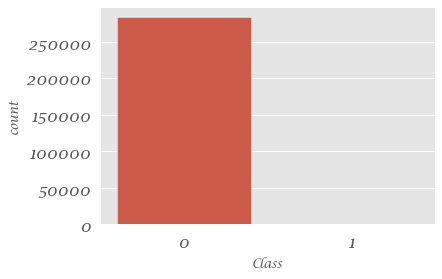

In [19]:
sns.countplot(x='Class', data=c_card)

In [24]:
c_card.groupby('Class').mean().T

Class,0,1
Time,94835.058093,80450.513742
V1,0.013439,-4.498280
V2,-0.009829,3.405965
V3,0.012853,-6.729599
V4,-0.010440,4.472591
V5,0.006769,-2.957197
V6,0.001251,-1.432518
V7,0.010447,-5.175912
V8,-0.002448,0.953255
V9,0.002613,-2.522124


In [27]:
non_fraud = c_card[c_card['Class']==0]
fraud = c_card[c_card['Class']==1]

In [28]:
non_fraud_sample = non_fraud.sample(n=473)

In [35]:
new_fraud_data = pd.concat([non_fraud_sample,fraud], axis=0)

In [36]:
new_fraud_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
112430,72646.0,1.072948,0.351576,0.344907,2.422097,0.286245,0.687581,-0.036305,0.339639,-0.704265,...,0.036311,0.166578,-0.039686,-0.319418,0.497583,0.135346,-0.000515,-0.008018,0.76,0
209913,137769.0,2.217078,-1.487757,-0.968634,-1.663636,-1.151867,-0.335163,-1.149788,-0.091777,-1.416514,...,-0.148959,0.015236,0.169413,-0.569729,-0.225068,-0.189482,0.009947,-0.058368,44.35,0
240361,150571.0,-1.781607,0.498533,1.609930,1.620090,2.139420,2.369225,-0.547315,0.179024,-1.080823,...,1.069722,0.471326,-0.155711,-0.909085,-0.175472,-0.094862,0.024798,0.236831,0.76,0
133976,80595.0,1.160052,-0.653807,0.845279,-1.489990,-1.083326,-0.227845,-0.788857,0.058446,1.710345,...,0.286089,0.969626,-0.151938,-0.174174,0.339977,0.161088,0.068036,0.034471,51.24,0
16690,28050.0,1.236457,0.326560,0.198327,0.496219,-0.114286,-0.549831,0.007184,-0.060986,-0.271983,...,-0.252266,-0.741633,0.070820,-0.024756,0.244764,0.095803,-0.024454,0.018303,1.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


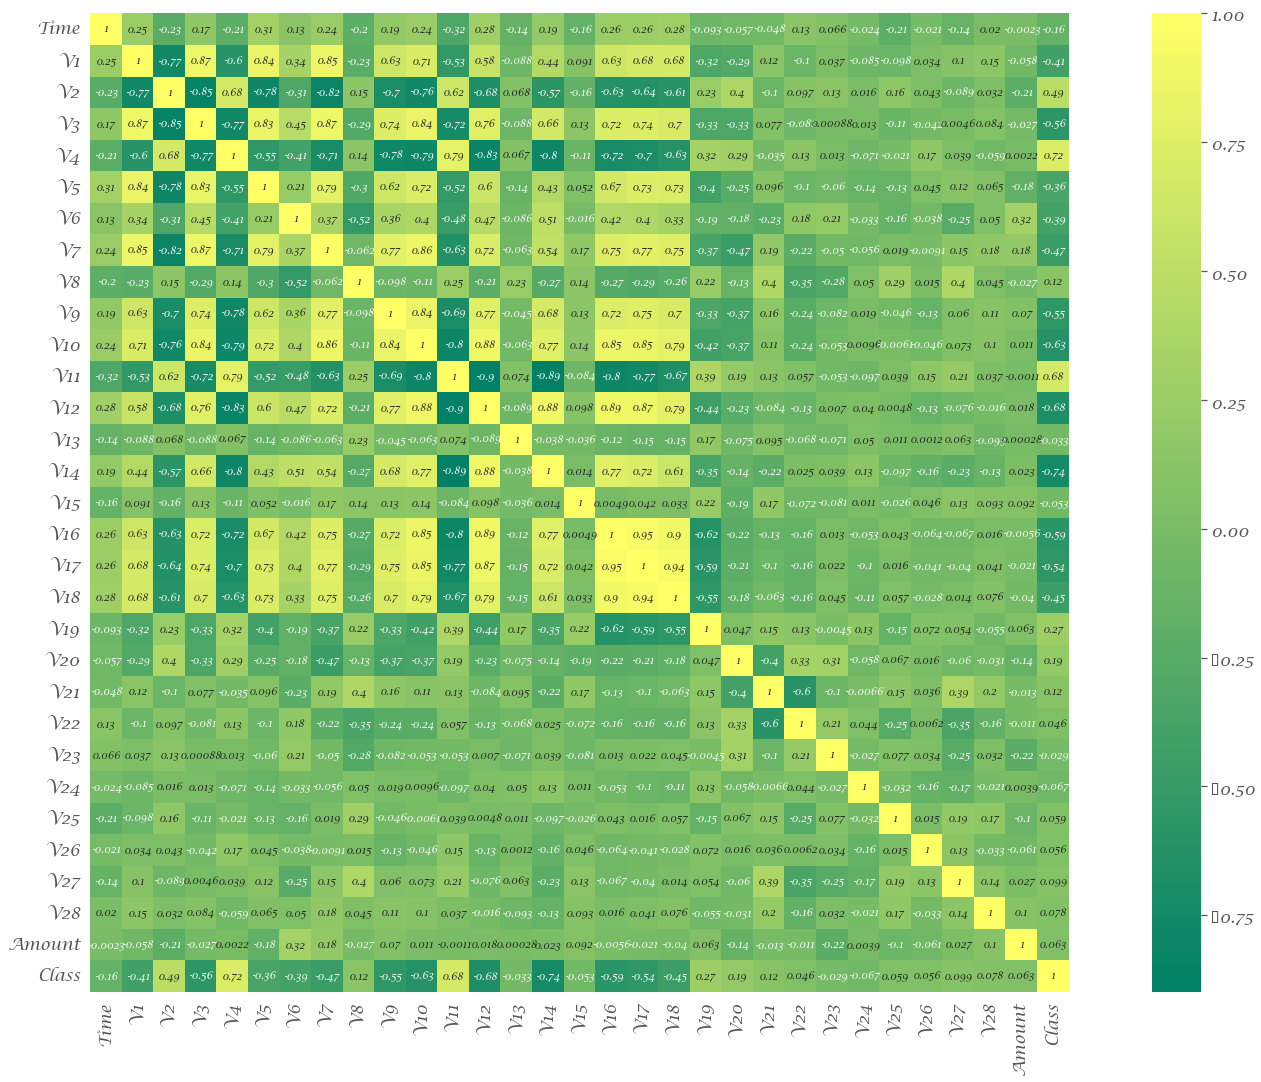

In [37]:
plt.figure(figsize=(30,18))
sns.heatmap(new_fraud_data.corr(),cmap='summer', annot=True, square=True,  )
plt.show()

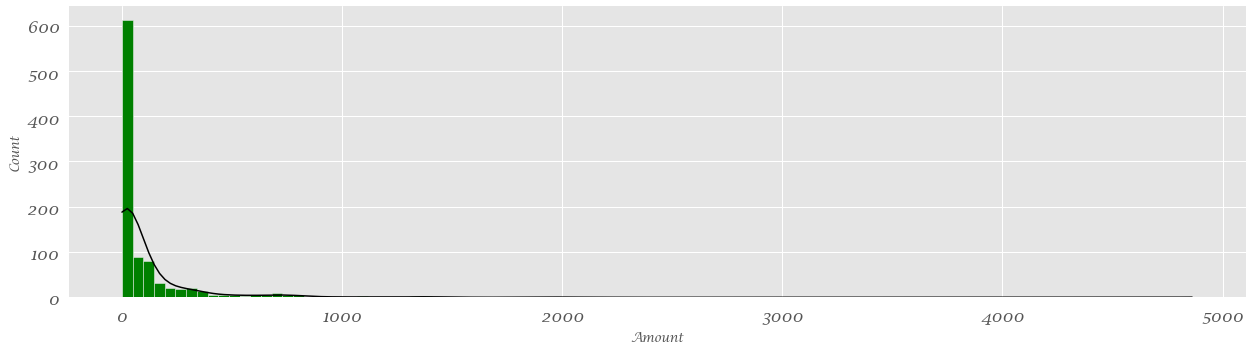

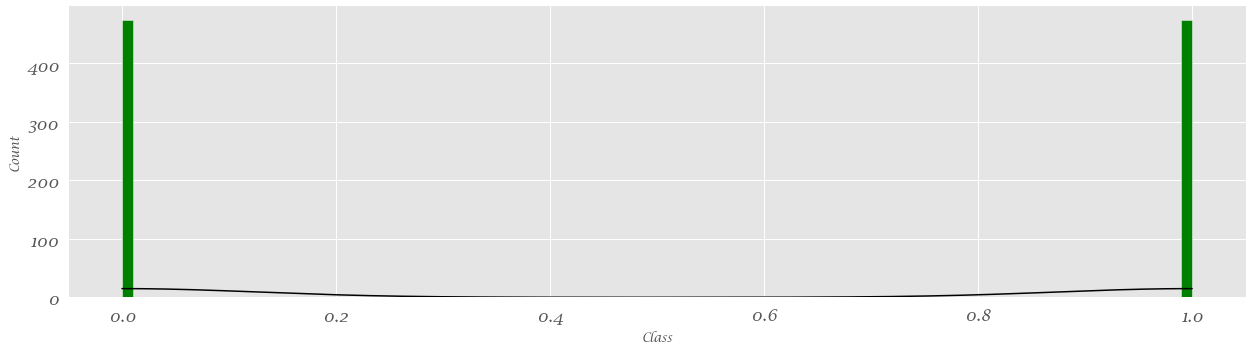

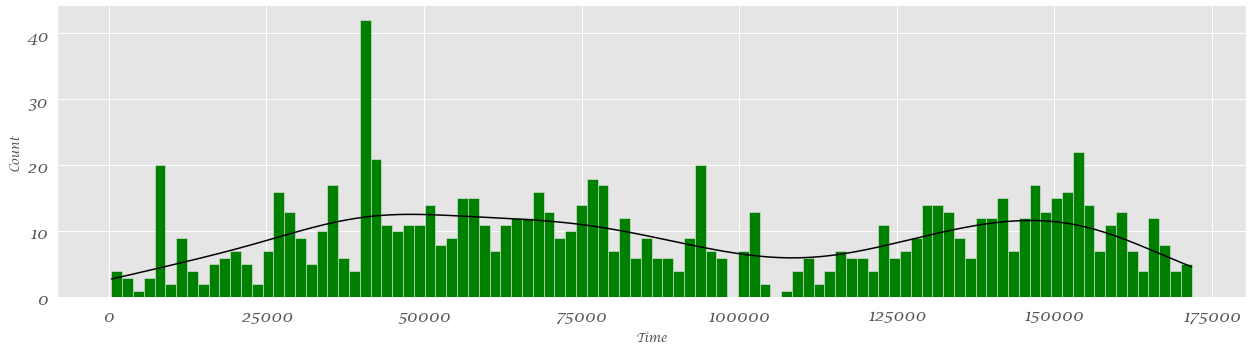

In [34]:
sns.displot(data=new_fraud_data, x="Amount", kde=True, bins = 100,color = "black", facecolor = "green",height = 5, aspect = 3.5)
sns.displot(data=new_fraud_data, x="Class", kde=True, bins = 100,color = "black", facecolor = "green",height = 5, aspect = 3.5)
sns.displot(data=new_fraud_data, x="Time", kde=True, bins = 100,color = "black", facecolor = "green",height = 5, aspect = 3.5)

<AxesSubplot:xlabel='Class', ylabel='count'>

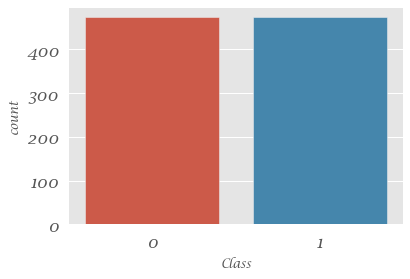

In [38]:
sns.countplot(x='Class', data=new_fraud_data)

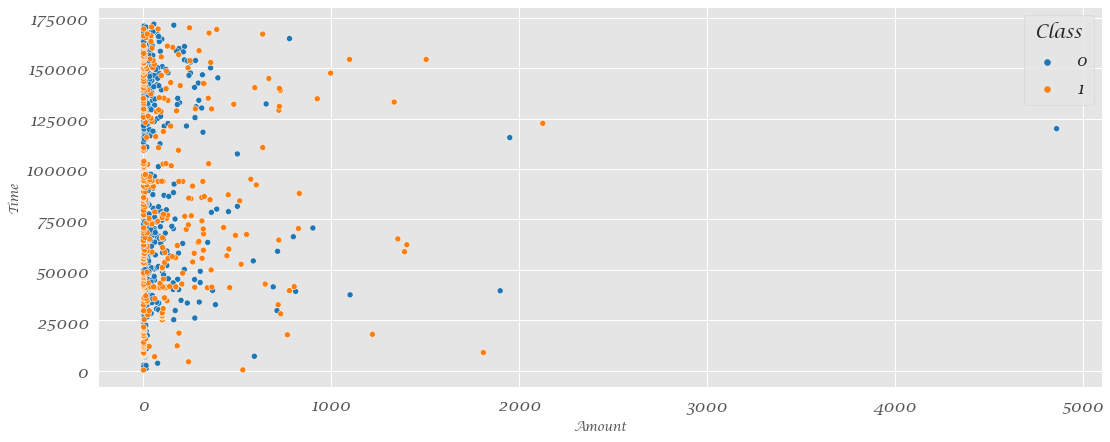

In [40]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=new_fraud_data, x="Amount", y="Time", hue="Class",palette="tab10");

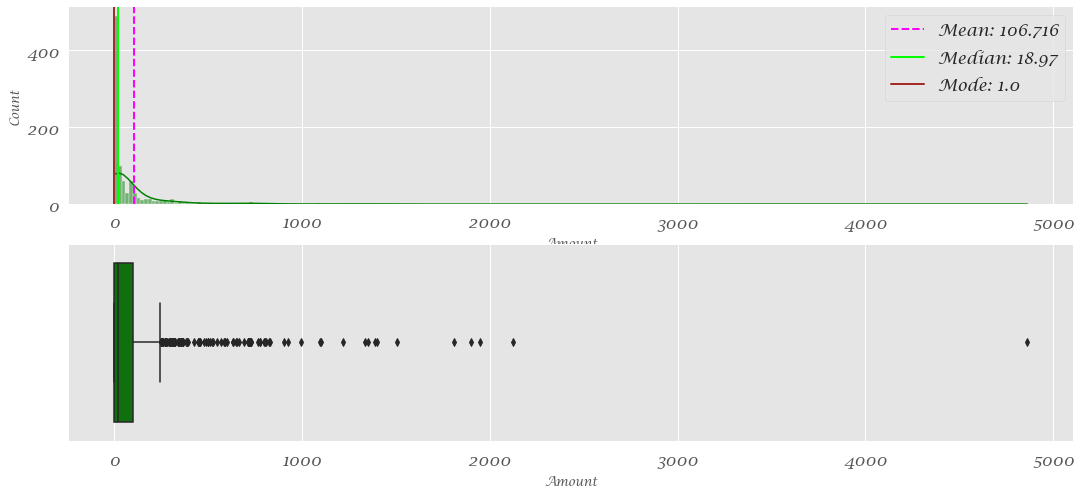

In [43]:
import statistics

def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = new_fraud_data[feature], kde = True, ax = ax[0],color='green')

    ax[0].axvline(x = new_fraud_data[feature].mean(), color = 'Magenta', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(new_fraud_data[feature].mean(), 3)))
    ax[0].axvline(x = new_fraud_data[feature].median(), color = 'lime', linewidth = 2, label = 'Median: {}'.format(round(new_fraud_data[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(new_fraud_data[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(new_fraud_data[feature])))
    ax[0].legend()
    
    sns.boxplot(x = new_fraud_data[feature], ax = ax[1],color='green')
    
    plt.show()

plot_hist('Amount')

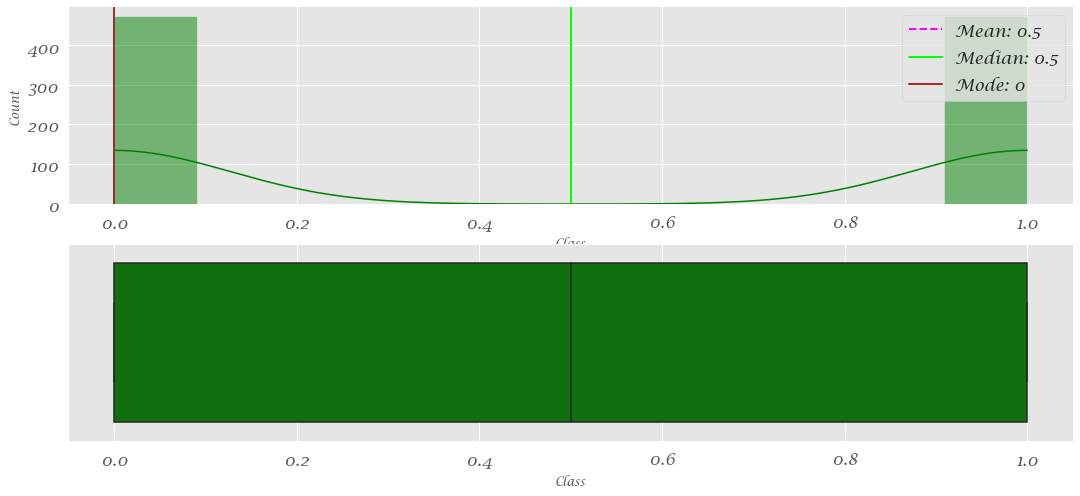

In [44]:
import statistics

def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = new_fraud_data[feature], kde = True, ax = ax[0],color='green')

    ax[0].axvline(x = new_fraud_data[feature].mean(), color = 'Magenta', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(new_fraud_data[feature].mean(), 3)))
    ax[0].axvline(x = new_fraud_data[feature].median(), color = 'lime', linewidth = 2, label = 'Median: {}'.format(round(new_fraud_data[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(new_fraud_data[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(new_fraud_data[feature])))
    ax[0].legend()
    
    sns.boxplot(x = new_fraud_data[feature], ax = ax[1],color='green')
    
    plt.show()

plot_hist('Class')

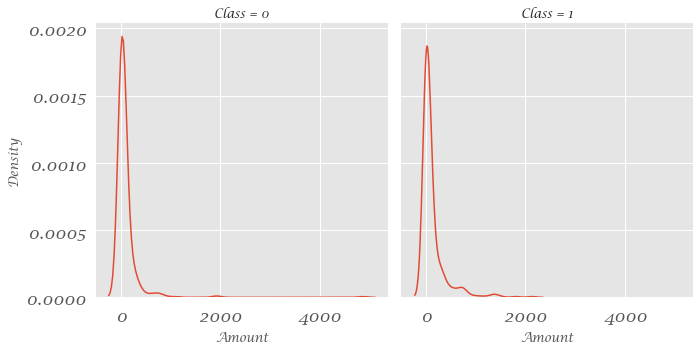

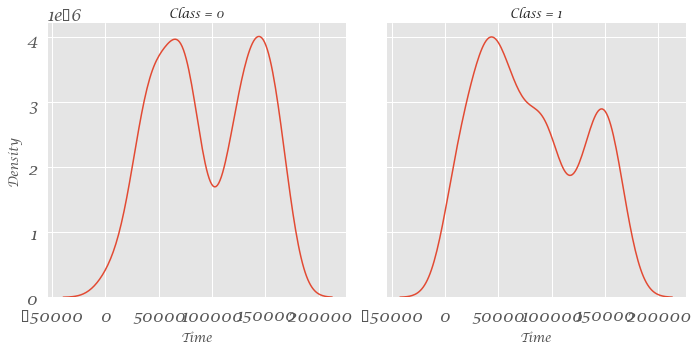

In [46]:
sns.displot(data=new_fraud_data, x="Amount", col="Class", kind="kde");
sns.displot(data=new_fraud_data, x="Time", col="Class", kind="kde");


In [47]:
X = new_fraud_data.drop(columns="Class" , axis=1)
y = new_fraud_data["Class"]

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Training Accuracy    : 100.0 %
Model Accuracy Score : 94.21 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94        88
           1       0.99      0.90      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.95      0.94       190
weighted avg       0.95      0.94      0.94       190

--------------------------------------------------------


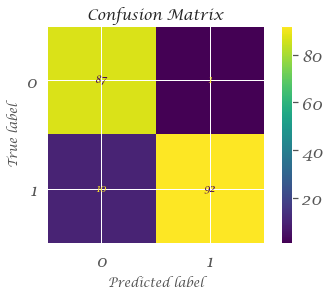

In [49]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(random_forest, X_test, y_test);
plt.title('Confusion Matrix');